SNR=5dB


  0%|          | 0/5 [00:00<?, ?it/s]c:\Users\Nolan\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\signal\_peak_finding.py:261: ComplexWarning: Casting complex values to real discards the imaginary part
  value = np.asarray(value, order='C', dtype=np.float64)
100%|██████████| 5/5 [00:33<00:00,  6.79s/it]


SNR=6dB


100%|██████████| 5/5 [00:32<00:00,  6.46s/it]


SNR=7dB


100%|██████████| 5/5 [00:32<00:00,  6.46s/it]


SNR=8dB


100%|██████████| 5/5 [00:32<00:00,  6.46s/it]


SNR=9dB


100%|██████████| 5/5 [00:33<00:00,  6.65s/it]


SNR=10dB


100%|██████████| 5/5 [00:32<00:00,  6.48s/it]


SNR=11dB


100%|██████████| 5/5 [00:32<00:00,  6.47s/it]


SNR=12dB


100%|██████████| 5/5 [00:32<00:00,  6.45s/it]


SNR=13dB


100%|██████████| 5/5 [00:33<00:00,  6.62s/it]


SNR=14dB


100%|██████████| 5/5 [00:32<00:00,  6.45s/it]


SNR=5dB


100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


SNR=6dB


100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


SNR=7dB


100%|██████████| 1/1 [00:01<00:00,  1.07s/it]


SNR=8dB


100%|██████████| 1/1 [00:00<00:00,  1.43it/s]


SNR=9dB


100%|██████████| 1/1 [00:00<00:00,  1.46it/s]


SNR=10dB


100%|██████████| 1/1 [00:00<00:00,  1.50it/s]


SNR=11dB


100%|██████████| 1/1 [00:00<00:00,  1.50it/s]


SNR=12dB


100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


SNR=13dB


100%|██████████| 1/1 [00:00<00:00,  1.55it/s]


SNR=14dB


100%|██████████| 1/1 [00:00<00:00,  1.41it/s]


[-1.23733118]
[[12.11310418]
 [11.89929629]
 [11.26412011]
 [11.95639006]
 [11.87081467]
 [11.76522495]
 [11.91652116]
 [11.86849712]
 [11.72452101]
 [11.70845022]]


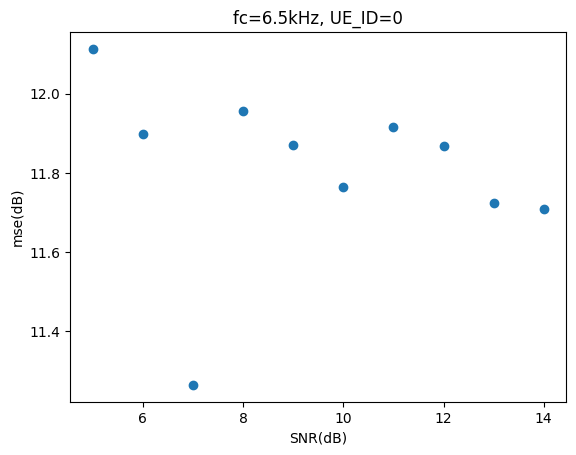

In [1]:
from bf_multichannel import bf_multichannel
from tx_gnb_sim import tx_gnb_sim
import numpy as np
import matplotlib.pyplot as plt

# fc = 6.5kHz
n_UE = 1 # 2
# n_path = 2?
My_bf = bf_multichannel(6.5e3, 2, 5,n_UE)
# rx at (0,0)
# tx_1 at (5,5) and (7.5,5) with a wall at x=10
# after relection, tx_2 at (15,5) and (12.5,5)
My_bf.reflection_list = np.array([1,0.5]) # what does reflection_list accomplish?
My_bf.x_tx_list = np.array([5,15])
My_bf.y_tx_list = np.array([5,5])
#My_bf.reflection_list = np.array([1,0.5]) # what does reflection_list accomplish?
#My_bf.x_tx_list = np.array([5,15,7.5,12.5])
#My_bf.y_tx_list = np.array([5,5,5,5])

# rethink with this math

theta = My_bf.simulation()

My_ue = tx_gnb_sim(6.5e3, 1, 1, theta)
# do not assume independence
My_ue.reflection_list = np.array([1,0.5])
#My_ue.x_tx_list = np.array([5,15]) #shouldn't need to touch gnb location
#My_ue.y_tx_list = np.array([5,5]) #shouldn't need to touch gnb location
My_ue.x_rx_list = My_bf.x_tx_list
My_ue.y_rx_list = My_bf.y_tx_list

"""
plt.figure()
plt.plot(My_bf.snr_list, My_bf.mean_mse, 'o')
plt.xlabel('SNR(dB)')
plt.ylabel('mse(dB)')
plt.title(f'fc={My_bf.fc/1000:.1f}kHz')
plt.show()
"""

My_ue.simulation()

# plt mean square error
print(theta)
print(My_ue.MSE_SNR)
for i_UE in range(0,n_UE):
    plt.figure(i_UE)
    plt.plot(My_ue.snr_list, My_ue.mean_mse[:,i_UE], 'o')
    plt.xlabel('SNR(dB)')
    plt.ylabel('mse(dB)')
    plt.title(f'fc={My_bf.fc/1000:.1f}kHz, UE_ID={i_UE}')

plt.show()